In [4]:
# drive dosya erişim
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#REGRESYON
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression #  scikit-learn kütüphanesinden doğrusal regresyon modelini içe aktarır
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # Bu metrikler, modelin performansını değerlendirmek için kullanılır. R-kare, modelin genel uyumunu gösterirken, MAE ve MSE hataların büyüklüğünü belirler.

In [21]:
path="/content/drive/MyDrive/Regresyon_Kümeleme_Sınıflandırma_Data/Salary_Data.csv"
df=pd.read_csv(path)
print(df.shape)
print(df.head())
print(df.isnull().sum())

(30, 2)
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
YearsExperience    0
Salary             0
dtype: int64


In [22]:
# ortalama değerlerden boşluğu doldurdum.
df.Salary.fillna(value=df.Salary.mean(), inplace = True)

In [23]:
# verileri normalize ediyorum. Burada MinMaxScaler kullanılarak bu işlem gerçekleştirildi.
df.YearsExperience = (df.YearsExperience - df.YearsExperience.min()) / (df.YearsExperience.max() - df.YearsExperience.min())
df.Salary = (df.Salary - df.Salary.min()) / (df.Salary.max() - df.Salary.min())

In [24]:
#Verileri X ve Y değişkenine atadım.
X = df.YearsExperience
Y = df.Salary

Text(0.5, 1.0, 'X-Y arasındaki ilişki')

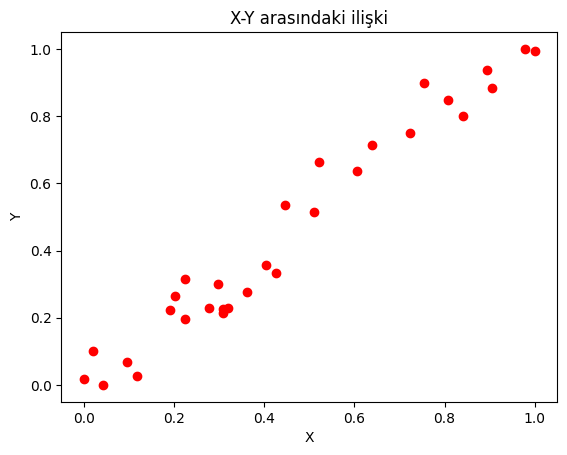

In [25]:
#veri görselleştrime x ve y yi işaretledim linner regresyon öncesi verim bu şeklide.
plt.scatter(X.values,Y.values,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X-Y arasındaki ilişki')

In [26]:
#doğrusal regresyon modeli oluşturmayı, veriye uygun hale getirmeyi ve modelin kesme noktası ve katsayılarını incelemeyi içerir.
linear_regression = LinearRegression() #LinearRegression nesnesi oluşturur.
linear_regression.fit(X.values.reshape(-1,1),Y.values.reshape(-1,1))# oluşturulan doğrusal regresyon modelini veriye uydurur. .fit() yöntemi, modeli veriyle eğitmek için kullanılır.
print(linear_regression.intercept_) # modelin kesme noktasını yazdırır.
print(linear_regression.coef_) # modelin katsayılarını (eğimlerini) yazdırır. Katsayılar, doğrusal regresyon çizgisinin eğimini temsil eder.

[-0.01823578]
[[1.04925166]]


In [27]:
# Modelin performansını görmek için predict komutu kullanıldı yani modelin tahmin yeteneklerini ve performansını anlama
Y_predicted = linear_regression.predict(X.values.reshape(-1,1))
print(Y_predicted)
print(r2_score(Y, Y_predicted))
print("Ortalama Mutlak Hata: {} \nOrtalama Karesel Hata: {}".format(mean_absolute_error(Y, Y_predicted), mean_squared_error(Y,Y_predicted)))

[[-0.01823578]
 [ 0.00408872]
 [ 0.02641323]
 [ 0.08222448]
 [ 0.10454899]
 [ 0.18268475]
 [ 0.193847  ]
 [ 0.21617151]
 [ 0.21617151]
 [ 0.27198276]
 [ 0.29430727]
 [ 0.30546952]
 [ 0.30546952]
 [ 0.31663177]
 [ 0.36128078]
 [ 0.40592978]
 [ 0.42825429]
 [ 0.45057879]
 [ 0.5175523 ]
 [ 0.52871455]
 [ 0.61801257]
 [ 0.65149932]
 [ 0.74079734]
 [ 0.77428409]
 [ 0.83009535]
 [ 0.86358211]
 [ 0.91939336]
 [ 0.93055562]
 [ 1.00869138]
 [ 1.03101588]]
0.9569566641435086
Ortalama Mutlak Hata: 0.054857090591111955 
Ortalama Karesel Hata: 0.004362993548418737


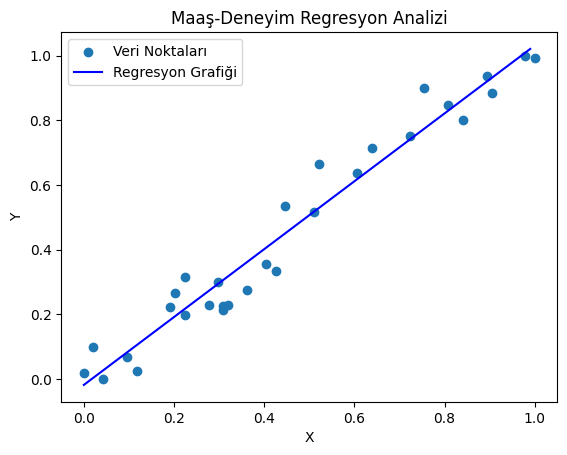

In [28]:
# regresyon grafiği üzerinde gösterme
import numpy as np
import matplotlib.pyplot as plt

# Veri noktalarını ve regresyon grafiğini gösterme
random_x = np.array([0, 0.5, 0.99])
plt.scatter(X.values, Y.values, label='Veri Noktaları')
plt.plot(random_x, linear_regression.intercept_[0] + linear_regression.coef_[0][0] * random_x, color='blue', label='Regresyon Grafiği')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Maaş-Deneyim Regresyon Analizi')
plt.legend()
plt.show()




> Blok alıntı ekle

